<a href="https://colab.research.google.com/github/rwdsIV/Opioids_Project/blob/main/Prescribing_Solutions_to_the_Opioid_Epidemic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
raw_dataset = pd.read_csv('Multiple Cause of Death 1999-2014 v1.1.csv')

In [ ]:
raw_dataset.columns
columns_to_drop = ['Crude Rate','Crude Rate Lower 95% Confidence Interval','Crude Rate Upper 95% Confidence Interval']
cleaned_dataset = raw_dataset.drop(columns=columns_to_drop)

In [ ]:
import numpy as np
cleaned_dataset = raw_dataset.replace(['Suppressed', 'Unreliable'], np.nan)
cleaned_dataset = cleaned_dataset.dropna()
print(cleaned_dataset.isin(['Suppressed', 'Unreliable']).any().any())


False


In [ ]:
print(cleaned_dataset)

       State  Year Deaths  Population Crude Rate  \
0    Alabama  1999     39     4430141        0.9   
1    Alabama  2000     46     4447100          1   
2    Alabama  2001     67     4467634        1.5   
3    Alabama  2002     75     4480089        1.7   
4    Alabama  2003     54     4503491        1.2   
..       ...   ...    ...         ...        ...   
811  Wyoming  2010     49      563626        8.7   
812  Wyoming  2011     47      568158        8.3   
813  Wyoming  2012     47      576412        8.2   
814  Wyoming  2013     52      582658        8.9   
815  Wyoming  2014     57      584153        9.8   

    Crude Rate Lower 95% Confidence Interval  \
0                                        0.6   
1                                        0.8   
2                                        1.2   
3                                        1.3   
4                                        0.9   
..                                       ...   
811                                    

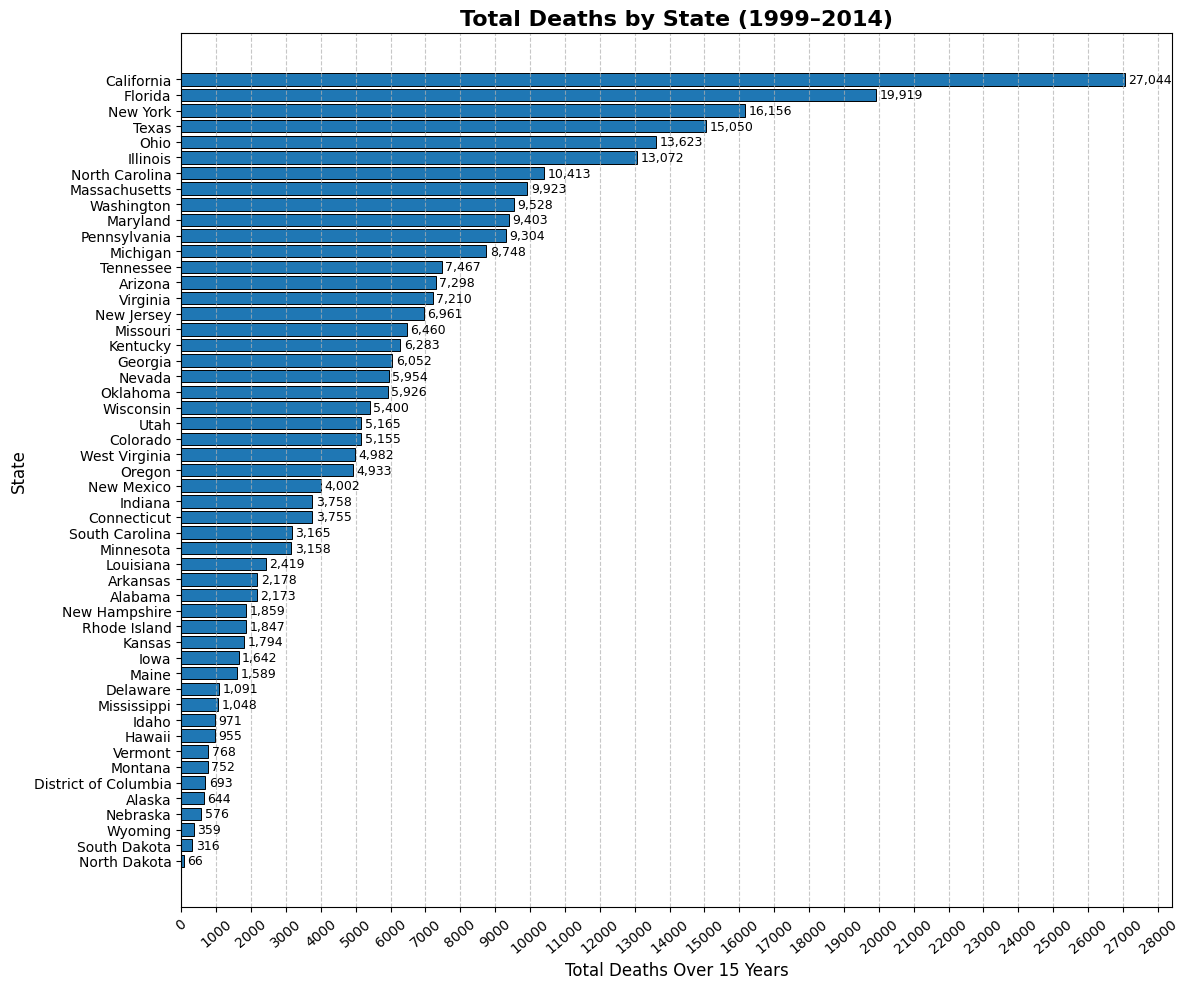

In [ ]:
cleaned_dataset['Deaths'] = pd.to_numeric(cleaned_dataset['Deaths'], errors='coerce')
total_deaths_by_state = cleaned_dataset.groupby('State')['Deaths'].sum().sort_values(ascending=True)
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(12, 10))
bars = plt.barh(total_deaths_by_state.index, total_deaths_by_state.values, edgecolor='black', linewidth=0.7)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.title('Total Deaths by State (1999–2014)', fontsize=16, fontweight='bold')
plt.xlabel('Total Deaths Over 15 Years', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=40)
plt.gca().xaxis.set_major_locator(MultipleLocator(1000))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 100, bar.get_y() + bar.get_height()/2, f'{int(width):,}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


necessary

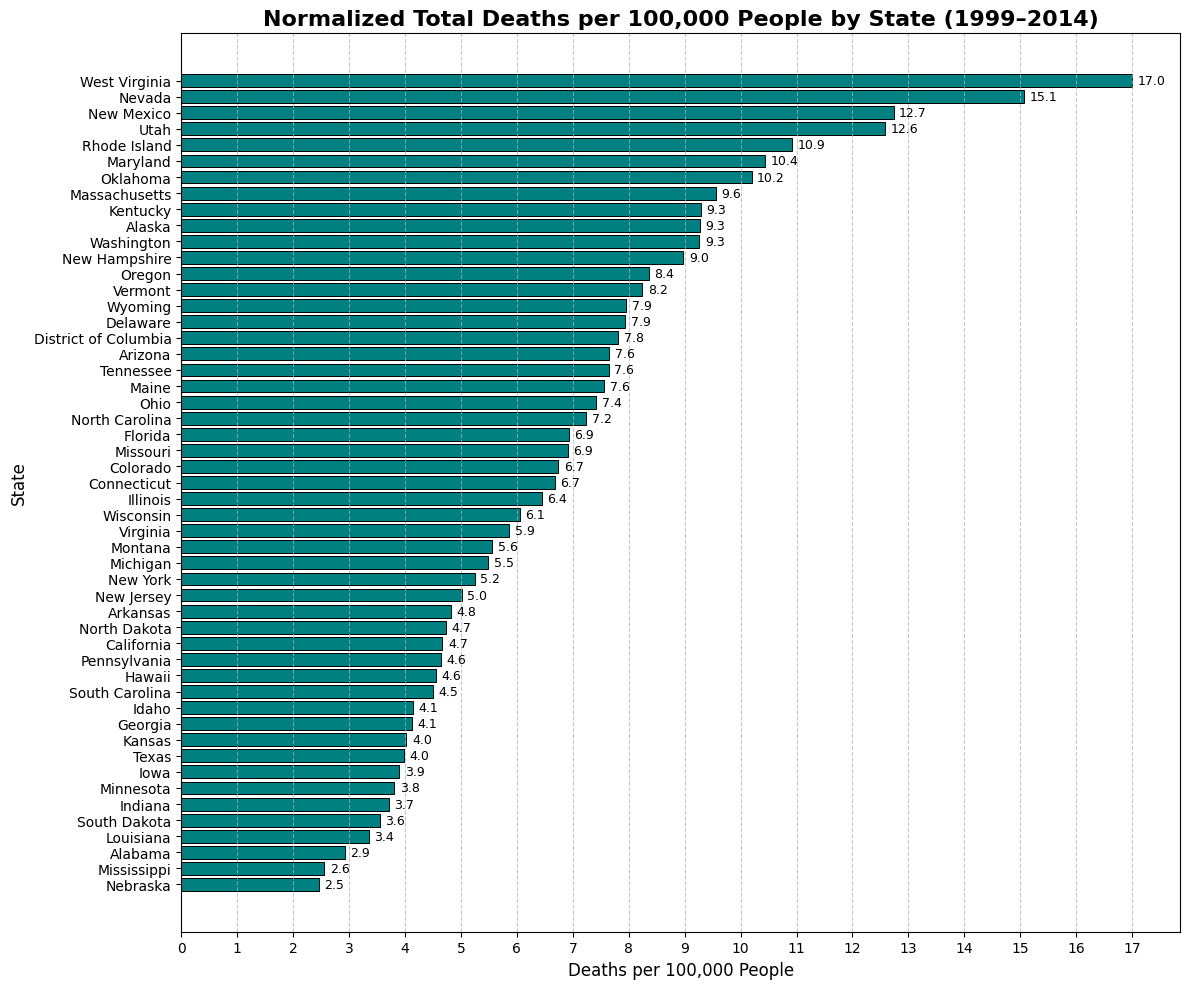

In [ ]:
cleaned_dataset['Deaths'] = pd.to_numeric(cleaned_dataset['Deaths'], errors='coerce')
cleaned_dataset['Population'] = pd.to_numeric(cleaned_dataset['Population'], errors='coerce')
grouped = cleaned_dataset.groupby('State')[['Deaths', 'Population']].sum()
grouped['Deaths per 100k'] = (grouped['Deaths'] / grouped['Population']) * 100000

normalized_deaths = grouped['Deaths per 100k'].sort_values(ascending=True)
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

plt.figure(figsize=(12, 10))
bars = plt.barh(normalized_deaths.index, normalized_deaths.values, edgecolor='black', linewidth=0.7, color='teal')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Normalized Total Deaths per 100,000 People by State (1999–2014)', fontsize=16, fontweight='bold')
plt.xlabel('Deaths per 100,000 People', fontsize=12)
plt.ylabel('State', fontsize=12)

plt.gca().xaxis.set_major_locator(MultipleLocator(1))

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Necessary

In [ ]:
cleaned_dataset['Deaths'] = cleaned_dataset['Deaths'].astype(np.int64)

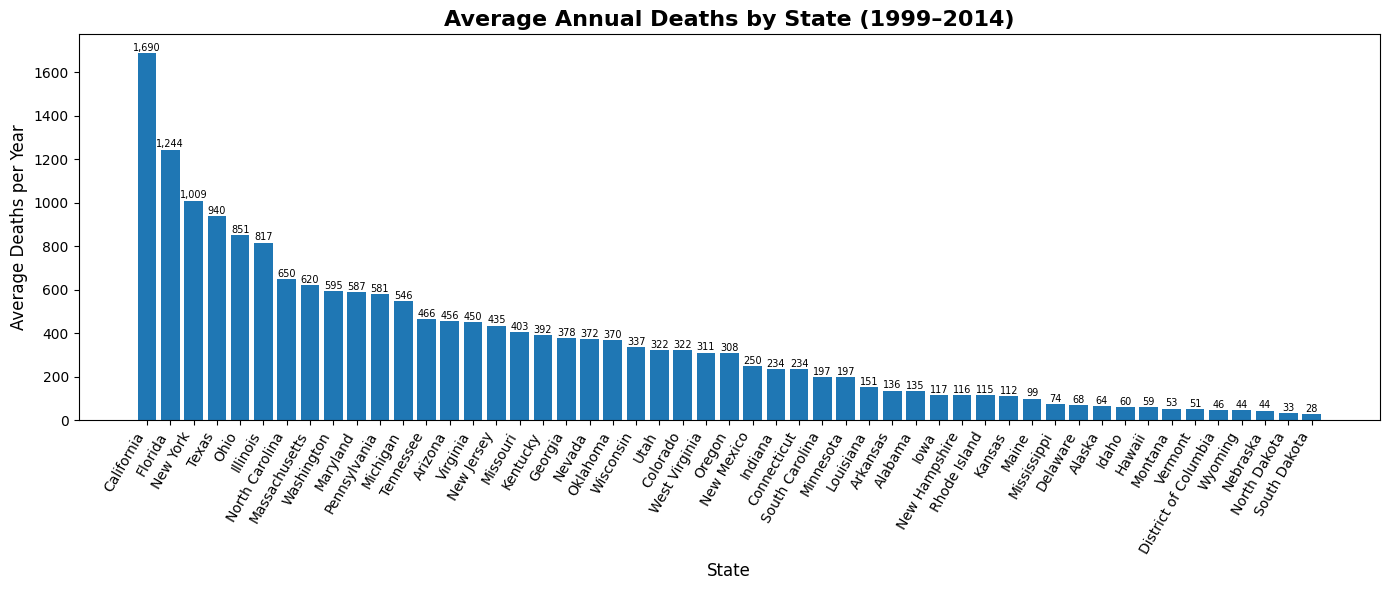

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_deaths = cleaned_dataset.groupby('State')['Deaths'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.bar(avg_deaths.index, avg_deaths.values)
plt.title('Average Annual Deaths by State (1999–2014)', fontsize=16, fontweight='bold')
plt.ylabel('Average Deaths per Year', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=60, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height):,}', ha='center', fontsize=7)

plt.tight_layout()
plt.show()

Necessary

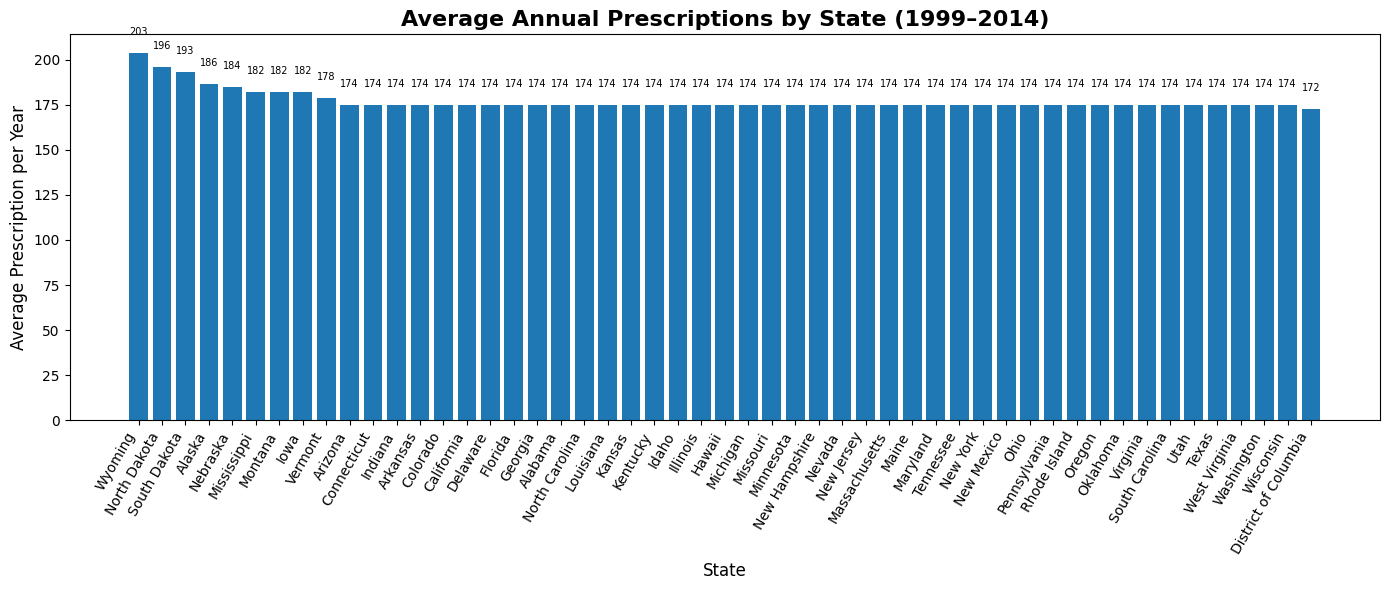

In [ ]:
avg_presc = cleaned_dataset.groupby('State')['Prescriptions Dispensed by US Retailers in that year (millions)'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
bars = plt.bar(avg_presc.index, avg_presc.values)
plt.title('Average Annual Prescriptions by State (1999–2014)', fontsize=16, fontweight='bold')
plt.ylabel('Average Prescription per Year', fontsize=12)
plt.xlabel('State', fontsize=12)
plt.xticks(rotation=60, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 10, f'{int(height):,}', ha='center', fontsize=7)

plt.tight_layout()
plt.show()

Not necessary (yet)

In [ ]:
cleaned_dataset['Percentage Deaths'] = (cleaned_dataset['Deaths'] / cleaned_dataset['Population']) * 100
avg_per = cleaned_dataset.groupby(['State', 'Year'])['Percentage Deaths'].mean()
avg_per

State    Year
Alabama  1999    0.000880
         2000    0.001034
         2001    0.001500
         2002    0.001674
         2003    0.001199
                   ...   
Wyoming  2010    0.008694
         2011    0.008272
         2012    0.008154
         2013    0.008925
         2014    0.009758
Name: Percentage Deaths, Length: 772, dtype: float64

Necessary

In [ ]:
cleaned_dataset.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),Percentage Deaths
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116,0.000880
1,Alabama,2000,46,4447100,1,0.8,1.4,126,0.001034
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138,0.001500
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142,0.001674
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149,0.001199


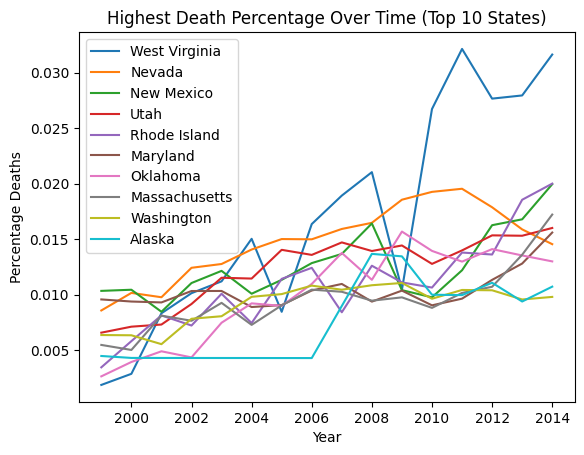

In [ ]:
state_average = cleaned_dataset.groupby("State")['Percentage Deaths'].mean().sort_values(ascending = False)
state_average.head()

top_states = state_average.head(10).index

filter_top_states = cleaned_dataset[cleaned_dataset['State'].isin(top_states)]

for state in top_states:
  state_data = filter_top_states[filter_top_states['State'] == state]
  sns.lineplot(data = state_data, x = "Year", y = "Percentage Deaths", label = state)

plt.legend()
plt.title("Highest Death Percentage Over Time (Top 10 States)")
plt.xlabel("Year")
plt.ylabel("Percentage Deaths")
plt.show()

Necessary

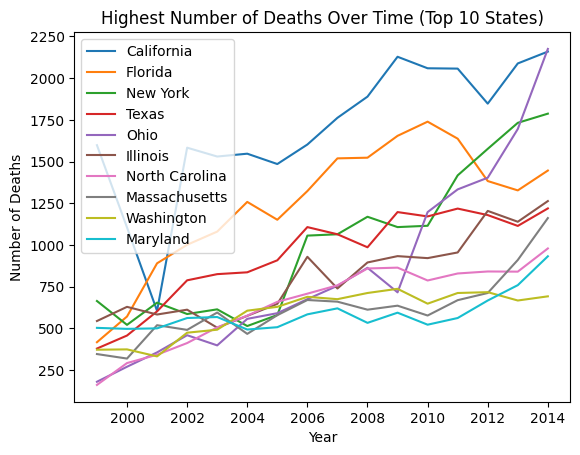

In [ ]:
state_average = cleaned_dataset.groupby("State")['Deaths'].mean().sort_values(ascending = False)
state_average.head()

top_states = state_average.head(10).index

filter_top_states = cleaned_dataset[cleaned_dataset['State'].isin(top_states)]

for state in top_states:
  state_data = filter_top_states[filter_top_states['State'] == state]
  sns.lineplot(data = state_data, x = "Year", y = "Deaths", label = state)

plt.legend()
plt.title("Highest Number of Deaths Over Time (Top 10 States)")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()

Necessary

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

cleaned_dataset['Year'] = pd.to_numeric(cleaned_dataset['Year'])
yearly_deaths = cleaned_dataset.groupby('Year')['Deaths'].sum().reset_index()

X = yearly_deaths['Year'].values.reshape(-1, 1)
y = yearly_deaths['Deaths'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

last_year = yearly_deaths['Year'].max()
future_years = np.arange(last_year + 1, last_year + 16).reshape(-1, 1)
predicted_deaths = model.predict(future_years)



mse = mean_squared_error(y_test, model.predict(X_test))
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test, model.predict(X_test))
print("Mean Absolute Error:", mae)


predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Deaths': predicted_deaths})
predictions_df

Mean Squared Error: 289263.07296205254
Mean Absolute Error: 497.3334837544244


,Year,Predicted Deaths
0,2015,29496.768051
1,2016,30834.118231
2,2017,32171.468412
3,2018,33508.818592
4,2019,34846.168773
5,2020,36183.518953
6,2021,37520.869134
7,2022,38858.219314
8,2023,40195.569495
9,2024,41532.919675


Necessary

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_percentage_error

def predict_state_deaths(state_name, years_to_predict=15):
    state_data = cleaned_dataset[cleaned_dataset['State'] == state_name]
    if state_data.empty:
        return "State not found in the dataset."

    state_yearly_deaths = state_data.groupby('Year')['Deaths'].sum().reset_index()
    X = state_yearly_deaths['Year'].values.reshape(-1, 1)
    y = state_yearly_deaths['Deaths'].values

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    last_year = state_yearly_deaths['Year'].max()
    future_years = np.arange(last_year + 1, last_year + 1 + years_to_predict).reshape(-1, 1)
    predicted_deaths = model.predict(future_years)

    predictions_df = pd.DataFrame({'Year': future_years.flatten(), 'Predicted Deaths': predicted_deaths})

    mse = mean_squared_error(y_test, model.predict(X_test))
    print('Mean Squared Error:', mse)
    mae = mean_absolute_error(y_test, model.predict(X_test))
    print("Mean Absolute Error:", mae)
    print('Intercept:', model.intercept_)
    print("Slope:", model.coef_)
    sse = sum((y_test - model.predict(X_test)**2))
    r2 = r2_score(y_true = y_test, y_pred = model.predict(X_test))
    print("r**2:", r2)


    return predictions_df

state_to_predict = "Nevada" #@param {type:"string"}
predictions = predict_state_deaths(state_to_predict)
predictions

Mean Squared Error: 2729.5943564365334
Mean Absolute Error: 43.56498194945925
Intercept: -43481.33574007218
Slope: [21.86101083]
r**2: 0.7719303693993246


,Year,Predicted Deaths
0,2015,568.601083
1,2016,590.462094
2,2017,612.323105
3,2018,634.184116
4,2019,656.045126
5,2020,677.906137
6,2021,699.767148
7,2022,721.628159
8,2023,743.489170
9,2024,765.350181


Necessary

In [ ]:
risk_assessment = [cleaned_dataset['Percentage Deaths'] < .003,
              (cleaned_dataset['Percentage Deaths'] > .003) & (cleaned_dataset['Percentage Deaths'] < .01),
              (cleaned_dataset['Percentage Deaths'] > .01)]

options = ['Low Risk', 'Medium Risk', 'High Risk']

cleaned_dataset['Risk'] = np.select(risk_assessment, options, default = 'Unknown').astype(str)
print(cleaned_dataset)

       State  Year  Deaths  Population Crude Rate  \
0    Alabama  1999      39     4430141        0.9   
1    Alabama  2000      46     4447100          1   
2    Alabama  2001      67     4467634        1.5   
3    Alabama  2002      75     4480089        1.7   
4    Alabama  2003      54     4503491        1.2   
..       ...   ...     ...         ...        ...   
811  Wyoming  2010      49      563626        8.7   
812  Wyoming  2011      47      568158        8.3   
813  Wyoming  2012      47      576412        8.2   
814  Wyoming  2013      52      582658        8.9   
815  Wyoming  2014      57      584153        9.8   

    Crude Rate Lower 95% Confidence Interval  \
0                                        0.6   
1                                        0.8   
2                                        1.2   
3                                        1.3   
4                                        0.9   
..                                       ...   
811                        

necessary (but I need to redo it and fix it)

In [ ]:
cleaned_dataset.head()

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),Percentage Deaths,Risk
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116,0.000880,Low Risk
1,Alabama,2000,46,4447100,1,0.8,1.4,126,0.001034,Low Risk
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138,0.001500,Low Risk
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142,0.001674,Low Risk
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149,0.001199,Low Risk


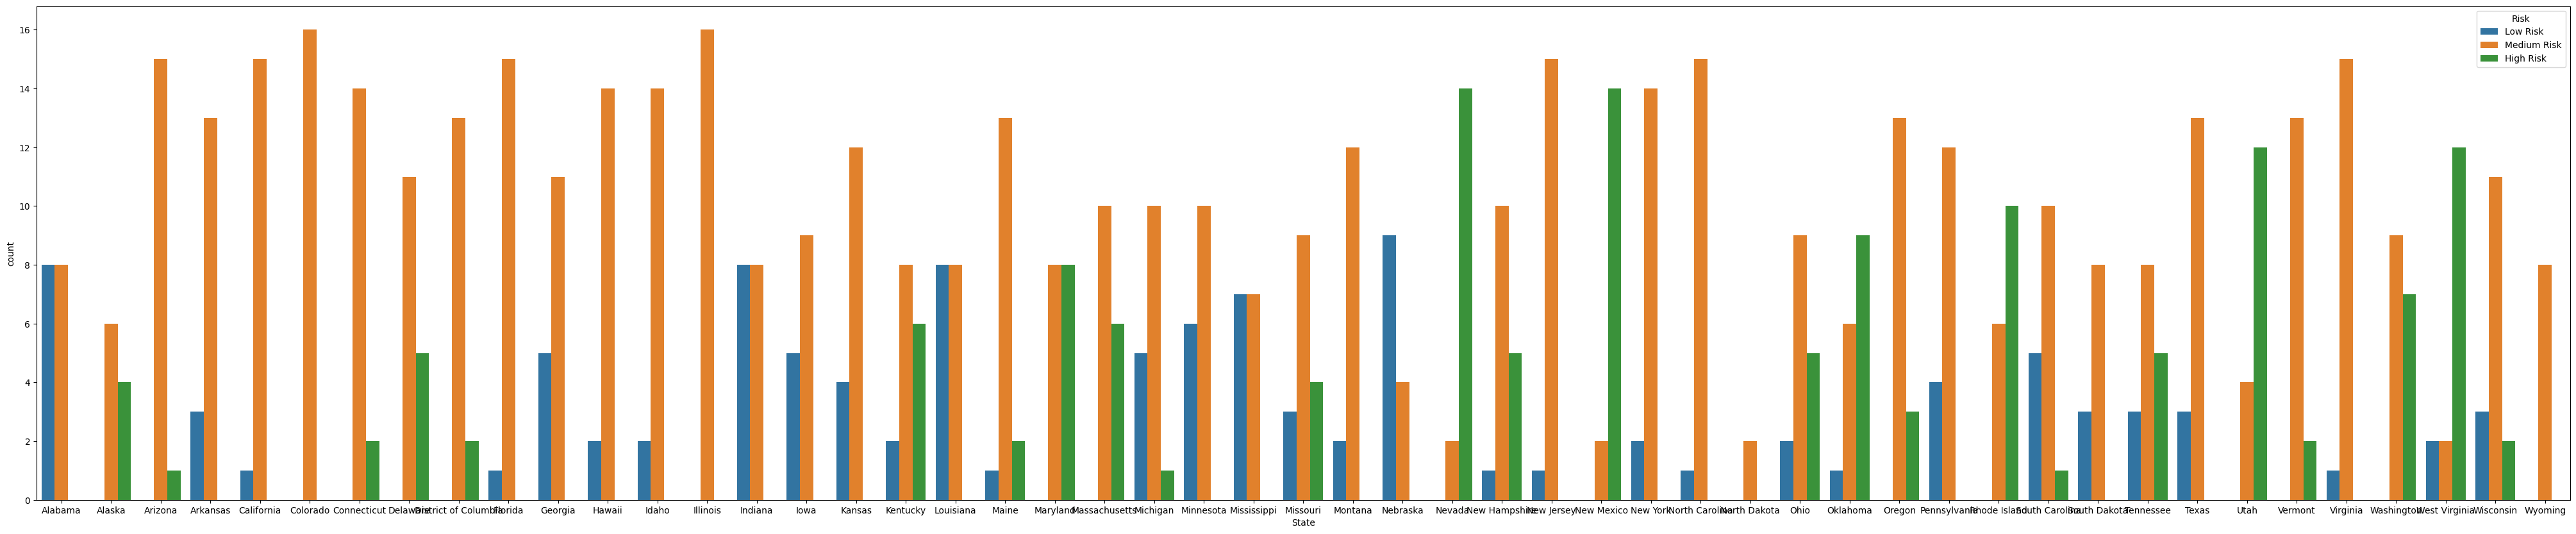

In [ ]:
num_states = len(cleaned_dataset['State'].unique())
plt.figure(figsize = (num_states, 10))
sns.countplot(x = 'State', hue = 'Risk', data = cleaned_dataset)
plt.gcf().set_size_inches(num_states, 10)

necessary

In [ ]:
cleaned_dataset['Risk'] = cleaned_dataset['Risk'].map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})
cleaned_dataset

,State,Year,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Prescriptions Dispensed by US Retailers in that year (millions),Percentage Deaths,Risk
0,Alabama,1999,39,4430141,0.9,0.6,1.2,116,0.000880,0
1,Alabama,2000,46,4447100,1,0.8,1.4,126,0.001034,0
2,Alabama,2001,67,4467634,1.5,1.2,1.9,138,0.001500,0
3,Alabama,2002,75,4480089,1.7,1.3,2.1,142,0.001674,0
4,Alabama,2003,54,4503491,1.2,0.9,1.6,149,0.001199,0
...,...,...,...,...,...,...,...,...,...,...
811,Wyoming,2010,49,563626,8.7,6.4,11.5,210,0.008694,1
812,Wyoming,2011,47,568158,8.3,6.1,11,219,0.008272,1
813,Wyoming,2012,47,576412,8.2,6,10.8,217,0.008154,1
814,Wyoming,2013,52,582658,8.9,6.7,11.7,207,0.008925,1


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

ind_features = cleaned_dataset[['Year', 'Deaths', 'Population', 'Prescriptions Dispensed by US Retailers in that year (millions)']]
dep_features = cleaned_dataset[['Risk']]

ind_df = ind_features.to_numpy()
dep_df = dep_features.to_numpy()

lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000, class_weight = 'balanced')

X_train, X_test, y_train, y_test = train_test_split(ind_df, dep_df, test_size = .2, random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape, y_train.shape

# train our models
lr_classifier.fit(X_train, y_train.ravel())

LogisticRegression(class_weight='balanced', max_iter=10000)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

y_predicted = lr_classifier.predict(X_test)
lr_classification = classification_report(y_test, y_predicted)
lr_accuracy = accuracy_score(y_predicted, y_test)
print(f"The accuracy of the Logistic Classifier = {lr_accuracy}")

print(f"{lr_classification}")

The accuracy of the Logistic Classifier = 0.8774193548387097
              precision    recall  f1-score   support

           0       0.63      1.00      0.77        17
           1       1.00      0.83      0.91       111
           2       0.75      1.00      0.86        27

    accuracy                           0.88       155
   macro avg       0.79      0.94      0.85       155
weighted avg       0.92      0.88      0.88       155



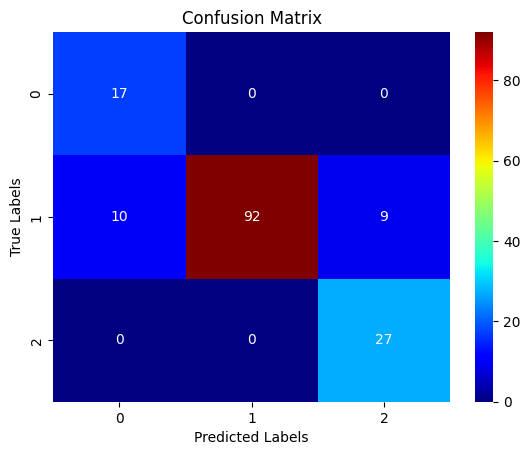

In [ ]:
from sklearn.metrics import confusion_matrix

cnf_mtrx = confusion_matrix(y_test, y_predicted)

sns.heatmap(cnf_mtrx, annot = True, cmap = 'jet')
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()